Predicted Machine Failure: 0.6666666666666666


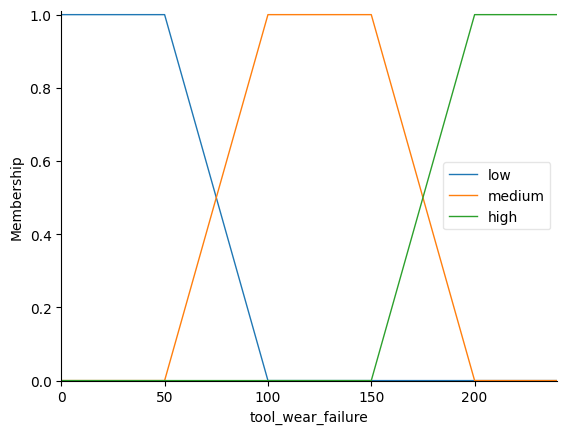

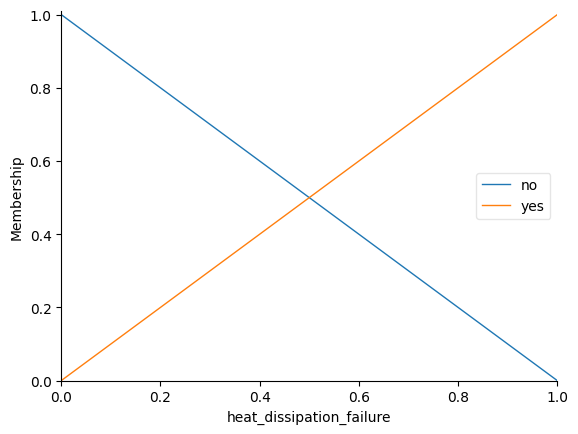

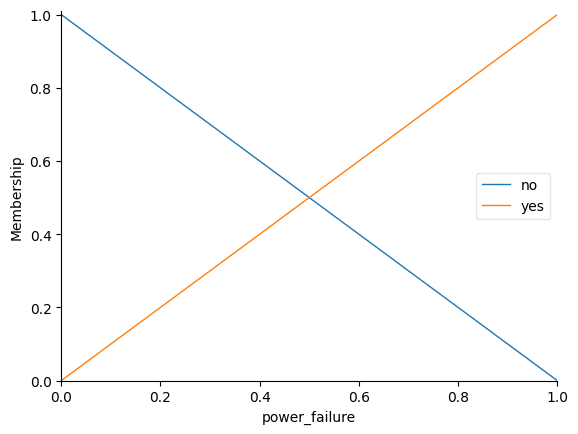

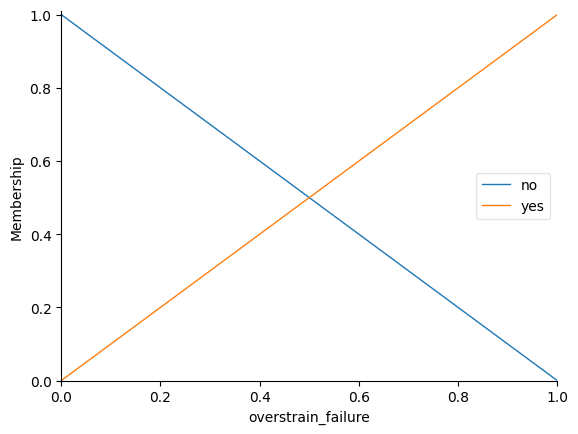

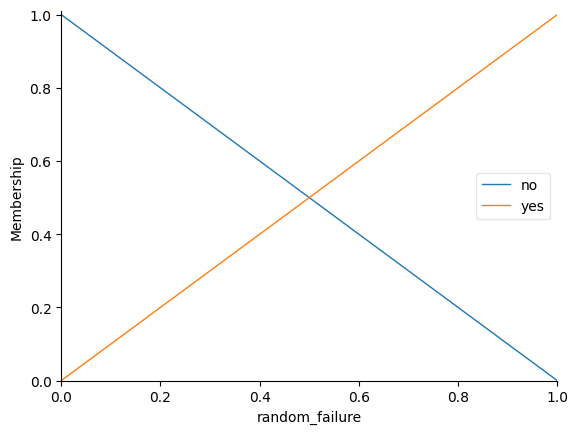

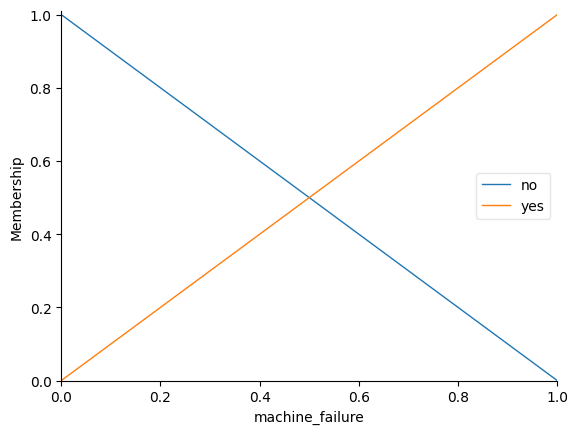

In [80]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for sample data
sample_data = dataset.iloc[0]  # Taking the first row as sample data

# Pass input values to the simulation
machine_failure_simulation.input['tool_wear_failure'] = sample_data['Tool wear [min]']
machine_failure_simulation.input['heat_dissipation_failure'] = 1 if sample_data['Air temperature [K]'] - sample_data['Process temperature [K]'] < 8.6 and sample_data['Rotational speed [rpm]'] < 1380 else 0
machine_failure_simulation.input['power_failure'] = 1 if sample_data['Torque [Nm]'] * sample_data['Rotational speed [rpm]'] < 3500 or sample_data['Torque [Nm]'] * sample_data['Rotational speed [rpm]'] > 9000 else 0
machine_failure_simulation.input['overstrain_failure'] = 1 if sample_data['Tool wear [min]'] * sample_data['Torque [Nm]'] > 11000 else 0
machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

# Compute the output
machine_failure_simulation.compute()

# Print the predicted machine failure
print("Predicted Machine Failure:", machine_failure_simulation.output['machine_failure'])

# Visualize the fuzzy control system
tool_wear_failure.view()
heat_dissipation_failure.view()
power_failure.view()
overstrain_failure.view()
random_failure.view()
machine_failure.view()

In [68]:
import pandas as pd
import numpy as np
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train MLP model
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict machine failure using the combined features for both training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print classification reports for both training and testing sets
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrices for both training and testing sets
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
print("Mean Cross-validation score:", cv_scores.mean())


Training Accuracy: 0.98125
Testing Accuracy: 0.9825
Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7722
           1       0.98      0.47      0.63       278

    accuracy                           0.98      8000
   macro avg       0.98      0.73      0.81      8000
weighted avg       0.98      0.98      0.98      8000

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.88      0.49      0.63        61

    accuracy                           0.98      2000
   macro avg       0.93      0.74      0.81      2000
weighted avg       0.98      0.98      0.98      2000

Training Confusion Matrix:
[[7720    2]
 [ 148  130]]
Testing Confusion Matrix:
[[1935    4]
 [  31   30]]
Cross-validation scores: [0.776 0.973 0.918 0.894 0.82  0.967 0.976 0.975 0.966 0.966]
Mean Cross-validation score: 0.923099

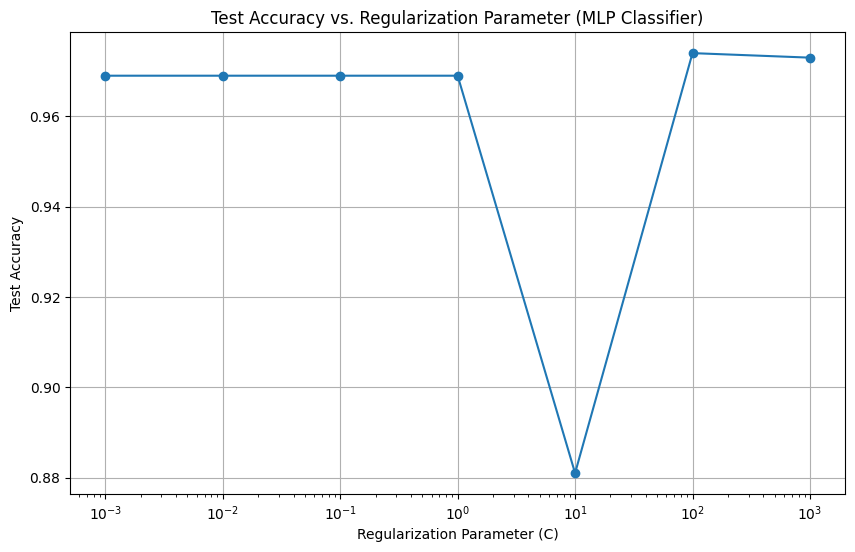

In [53]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Define a range of regularization parameters (C values)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize an empty list to store test accuracies
test_accuracy_values = []

# Train MLP classifier for each value of C
for C in C_values:
    clf = MLPClassifier(alpha=1/C, random_state=42)  # Alpha is the inverse of regularization strength (1/C)
    clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    test_accuracy_values.append(test_accuracy)

# Plot test accuracy vs. regularization parameter (C)
plt.figure(figsize=(10, 6))
plt.plot(C_values, test_accuracy_values, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Regularization Parameter (MLP Classifier)')
plt.grid(True)
plt.show()


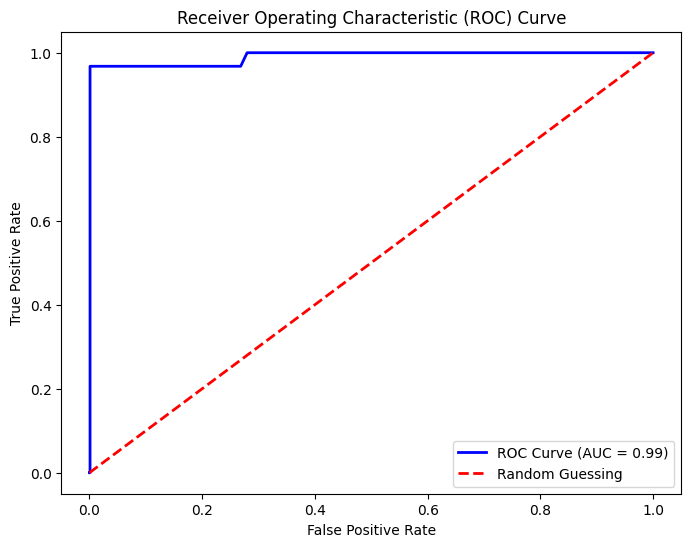

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#clf = MLPClassifier()
#clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [67]:
import pandas as pd
import numpy as np
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from sklearn.metrics import classification_report, confusion_matrix
# Train Gradient Boosting classifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Predict machine failure using the combined features for both training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print classification reports for both training and testing sets
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrices for both training and testing sets
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
print("Mean Cross-validation score:", cv_scores.mean())


Training Accuracy: 0.9994444444444445
Testing Accuracy: 0.998
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8692
           1       1.00      0.98      0.99       308

    accuracy                           1.00      9000
   macro avg       1.00      0.99      1.00      9000
weighted avg       1.00      1.00      1.00      9000

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       0.97      0.97      0.97        31

    accuracy                           1.00      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       1.00      1.00      1.00      1000

Training Confusion Matrix:
[[8692    0]
 [   5  303]]
Testing Confusion Matrix:
[[968   1]
 [  1  30]]
Cross-validation scores: [1.    0.997 0.999 0.999 0.998 0.979 0.997 0.997 0.998 0.997]
Mean Cross-validation score: 0.

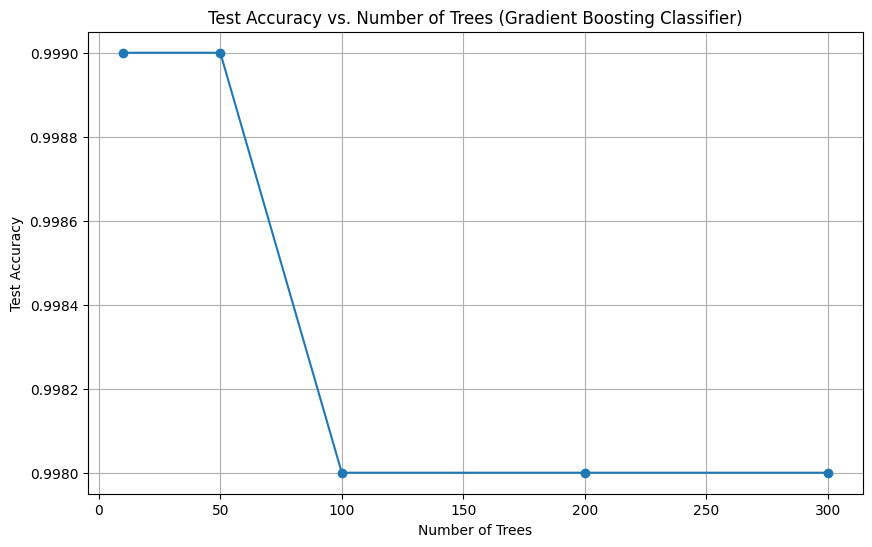

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Define a range of values for the hyperparameter (e.g., number of trees)
n_estimators_values = [10, 50, 100, 200, 300]

# Initialize an empty list to store test accuracies
test_accuracy_values = []

# Train Gradient Boosting classifier for each value of the hyperparameter
for n_estimators in n_estimators_values:
    clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    test_accuracy_values.append(test_accuracy)

# Plot test accuracy vs. the hyperparameter (e.g., number of trees)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, test_accuracy_values, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Trees (Gradient Boosting Classifier)')
plt.grid(True)
plt.show()


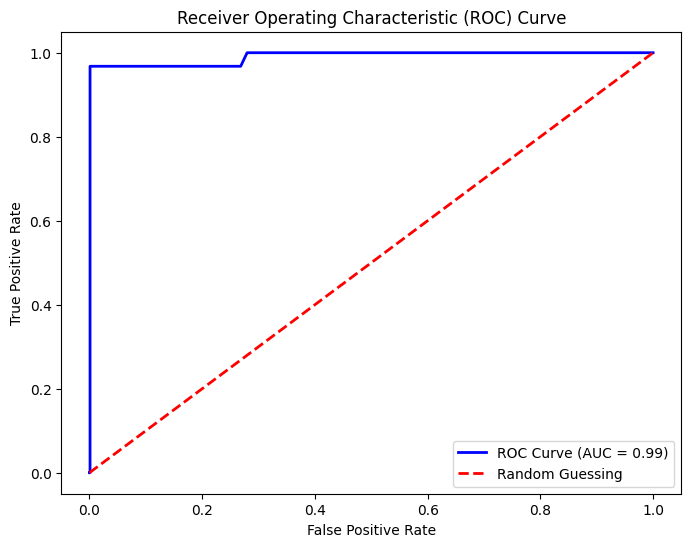

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# Predict probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [66]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.6, random_state=42)


from sklearn.metrics import classification_report, confusion_matrix

# Train Gradient Boosting classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict machine failure using the combined features for both training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print classification reports for both training and testing sets
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrices for both training and testing sets
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
print("Mean Cross-validation score:", cv_scores.mean())


Training Accuracy: 1.0
Testing Accuracy: 0.998
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5797
           1       1.00      1.00      1.00       203

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.97      0.97      0.97        61

    accuracy                           1.00      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       1.00      1.00      1.00      2000

Training Confusion Matrix:
[[5797    0]
 [   0  203]]
Testing Confusion Matrix:
[[1937    2]
 [   2   59]]
Cross-validation scores: [1.    0.999 0.999 0.996 0.962 0.866 0.713 0.997 0.95  0.996]
Mean Cross-validation score: 0.9478


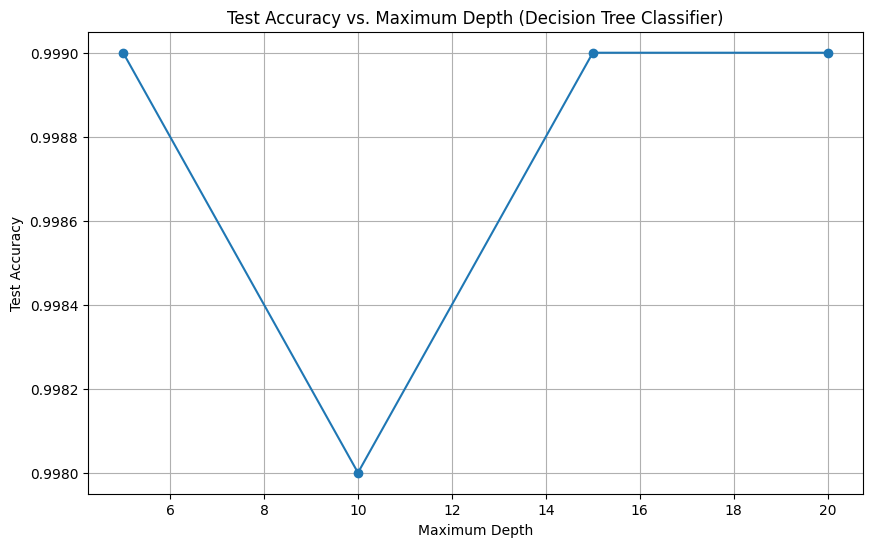

In [58]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Define a range of values for the hyperparameter (e.g., maximum depth)
max_depth_values = [None, 5, 10, 15, 20]

# Initialize an empty list to store test accuracies
test_accuracy_values = []

# Train Decision Tree classifier for each value of the hyperparameter
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    test_accuracy_values.append(test_accuracy)

# Plot test accuracy vs. the hyperparameter (e.g., maximum depth)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, test_accuracy_values, marker='o')
plt.xlabel('Maximum Depth')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Maximum Depth (Decision Tree Classifier)')
plt.grid(True)
plt.show()


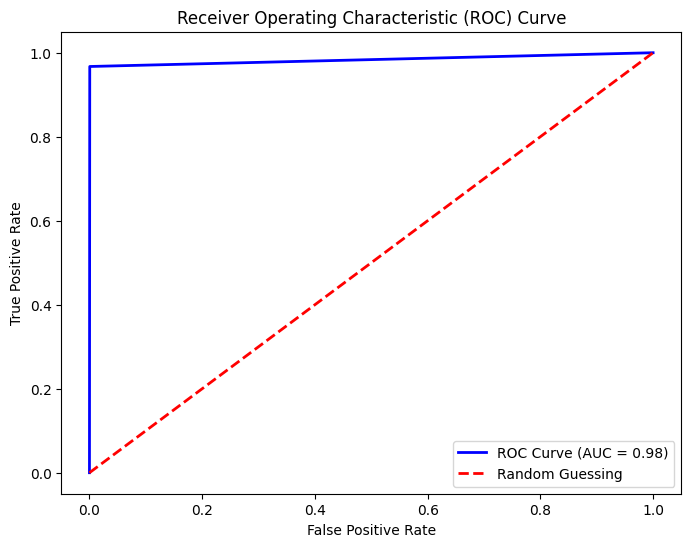

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Predict probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict machine failure using the combined features for both training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print classification reports for both training and testing sets
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Print confusion matrices for both training and testing sets
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
print("Mean Cross-validation score:", cv_scores.mean())


Training Accuracy: 1.0
Testing Accuracy: 0.999
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7722
           1       1.00      1.00      1.00       278

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Training Confusion Matrix:
[[7722    0]
 [   0  278]]
Testing Confusion Matrix:
[[1939    0]
 [   2   59]]
Cross-validation scores: [1.    0.999 0.999 0.999 1.    1.    0.999 0.997 1.    0.998]
Mean Cross-validation score: 0.9991


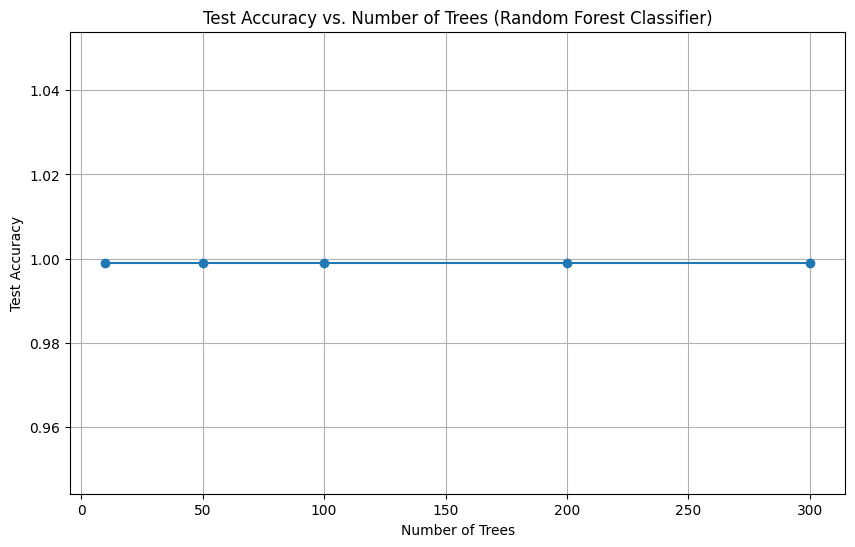

In [57]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define a range of values for the hyperparameter (e.g., number of trees)
n_estimators_values = [10, 50, 100, 200, 300]

# Initialize an empty list to store test accuracies
test_accuracy_values = []

# Train Random Forest classifier for each value of the hyperparameter
for n_estimators in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    test_accuracy_values.append(test_accuracy)

# Plot test accuracy vs. the hyperparameter (e.g., number of trees)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, test_accuracy_values, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Trees (Random Forest Classifier)')
plt.grid(True)
plt.show()


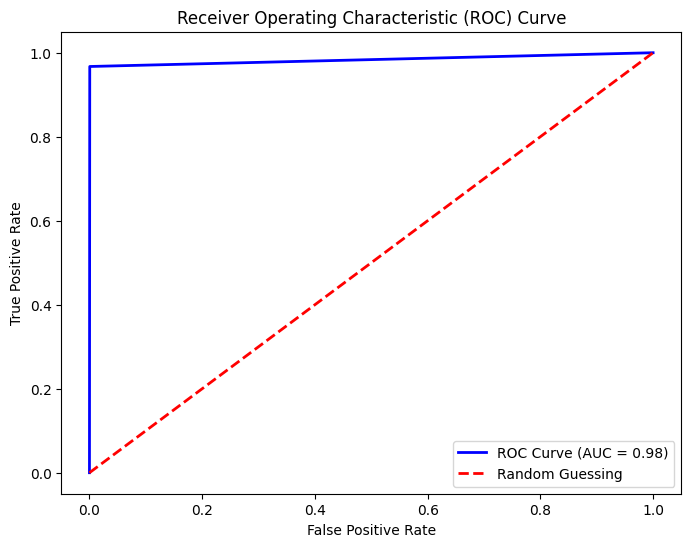

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# Predict probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [61]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict machine failure using logistic regression model
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

Accuracy (Logistic Regression): 0.976


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)  # cv=10 means 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
print("Mean Cross-validation score:", cv_scores.mean())

Cross-validation scores: [1.    0.999 0.999 0.999 1.    1.    0.999 0.997 1.    0.998]
Mean Cross-validation score: 0.9991


In [ ]:
import pandas as pd
import numpy as np
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.ensemble import GradientBoostingClassifier


# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting model
start_train_time = time.time()
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
end_train_time = time.time()

# Make predictions
start_pred_time = time.time()
y_pred = gb_model.predict(X_test)
end_pred_time = time.time()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate time taken for training and predicting
train_time = end_train_time - start_train_time
pred_time = end_pred_time - start_pred_time
total_time = train_time + pred_time

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("MCC score:", mcc)
print("Time to train:", train_time)
print("Time to predict:", pred_time)
print("Total time:", total_time)

Accuracy: 0.999
Precision: 1.0
Recall: 0.9672131147540983
F1-Score: 0.9833333333333333
MCC score: 0.9829631231891754
Time to train: 2.248886823654175
Time to predict: 0.0068836212158203125
Total time: 2.255770444869995


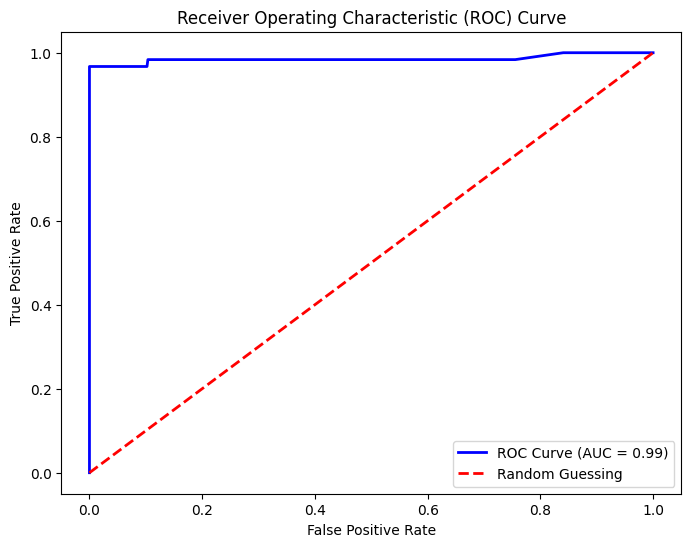

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train Random Forest classifier
clf =  GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter from the default value
logistic_model.fit(X_train, y_train)

# Predict machine failure using logistic regression model
y_pred_logistic = logistic_model.predict(X_test)

# Print classification report
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



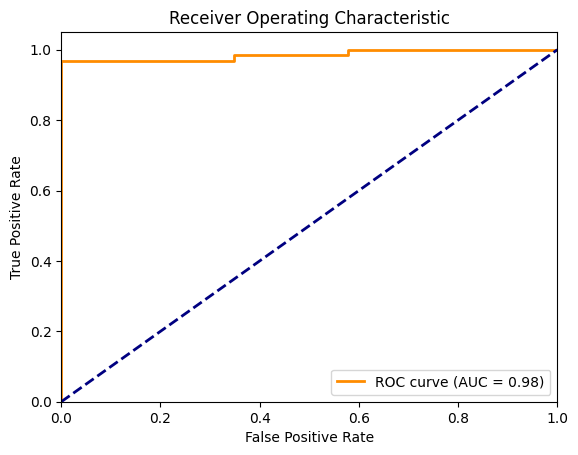

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter from the default value
logistic_model.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [70]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Train performance
y_pred_train = logistic_model.predict(X_train)

# Evaluate metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_report_train = classification_report(y_train, y_pred_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

# Test performance
y_pred_test = logistic_model.predict(X_test)

# Evaluate metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print results
print("Training Set Performance:")
print("Accuracy:", accuracy_train)
print("Classification Report:")
print(classification_report_train)
print("Confusion Matrix:")
print(confusion_matrix_train)

print("\nTest Set Performance:")
print("Accuracy:", accuracy_test)
print("Classification Report:")
print(classification_report_test)
print("Confusion Matrix:")
print(confusion_matrix_test)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
print("Mean Cross-validation score:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Set Performance:
Accuracy: 0.974625
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7722
           1       0.81      0.35      0.49       278

    accuracy                           0.97      8000
   macro avg       0.89      0.67      0.74      8000
weighted avg       0.97      0.97      0.97      8000

Confusion Matrix:
[[7699   23]
 [ 180   98]]

Test Set Performance:
Accuracy: 0.976
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.70      0.38      0.49        61

    accuracy                           0.98      2000
   macro avg       0.84      0.69      0.74      2000
weighted avg       0.97      0.98      0.97      2000

Confusion Matrix:
[[1929   10]
 [  38   23]]
Cross-validation scores: [0.776 0.973 0.918 0.894 0.82  0.967 0.976 0.975 0.966 0.966]
Mean Cross-validation score: 0.92309999

In [71]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Train performance
y_pred_train = logistic_model.predict(X_train)

# Evaluate metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_report_train = classification_report(y_train, y_pred_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)

# Test performance
y_pred_test = logistic_model.predict(X_test)

# Evaluate metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print results
print("Training Set Performance:")
print("Accuracy:", accuracy_train)
print("Classification Report:")
print(classification_report_train)
print("Confusion Matrix:")
print(confusion_matrix_train)

print("\nTest Set Performance:")
print("Accuracy:", accuracy_test)
print("Classification Report:")
print(classification_report_test)
print("Confusion Matrix:")
print(confusion_matrix_test)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=20)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
print("Mean Cross-validation score:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Set Performance:
Accuracy: 0.974625
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7722
           1       0.81      0.35      0.49       278

    accuracy                           0.97      8000
   macro avg       0.89      0.67      0.74      8000
weighted avg       0.97      0.97      0.97      8000

Confusion Matrix:
[[7699   23]
 [ 180   98]]

Test Set Performance:
Accuracy: 0.976
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.70      0.38      0.49        61

    accuracy                           0.98      2000
   macro avg       0.84      0.69      0.74      2000
weighted avg       0.97      0.98      0.97      2000

Confusion Matrix:
[[1929   10]
 [  38   23]]
Cross-validation scores: [0.972 0.976 0.97  0.984 0.968 0.912 0.966 0.966 0.984 0.912 0.656 0.966
 0.966 0.97  0.966 0.966 0.9

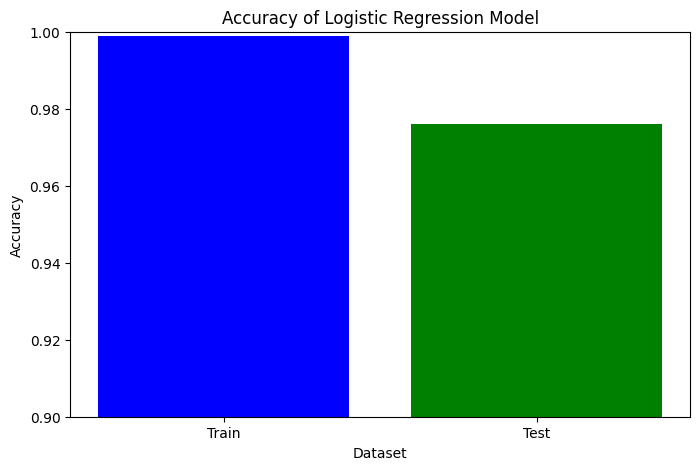

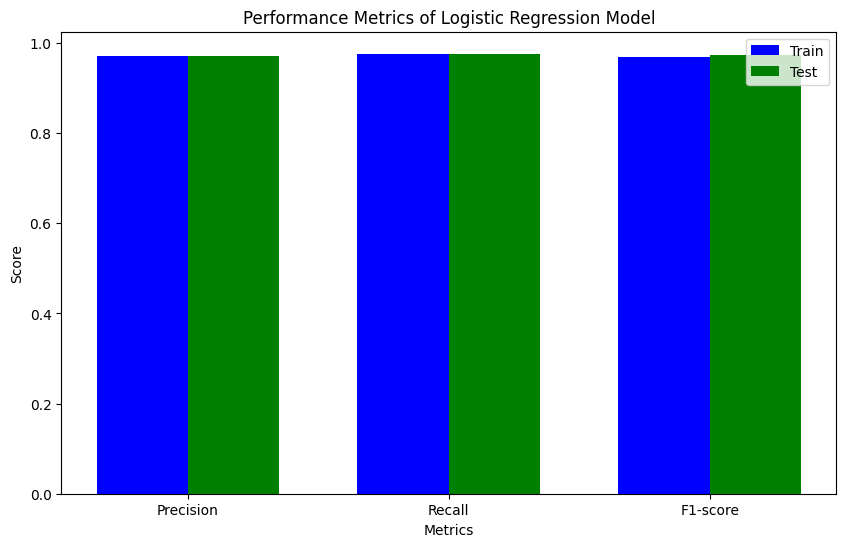

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_fscore_support

# Define performance metrics
accuracy_train = 0.999
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate precision, recall, and F1-score for both sets
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# Create bar plot for accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Train', 'Test'], [accuracy_train, accuracy_test], color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression Model')
plt.ylim(0.9, 1.0)
plt.show()

# Create grouped bar plot for precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-score']
train_scores = [precision_train, recall_train, f1_train]
test_scores = [precision_test, recall_test, f1_test]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
bar_width = 0.35
plt.bar(x, train_scores, width=bar_width, label='Train', color='blue')
plt.bar([i + bar_width for i in x], test_scores, width=bar_width, label='Test', color='green')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics of Logistic Regression Model')
plt.xticks([i + bar_width / 2 for i in x], metrics)
plt.legend()
plt.show()



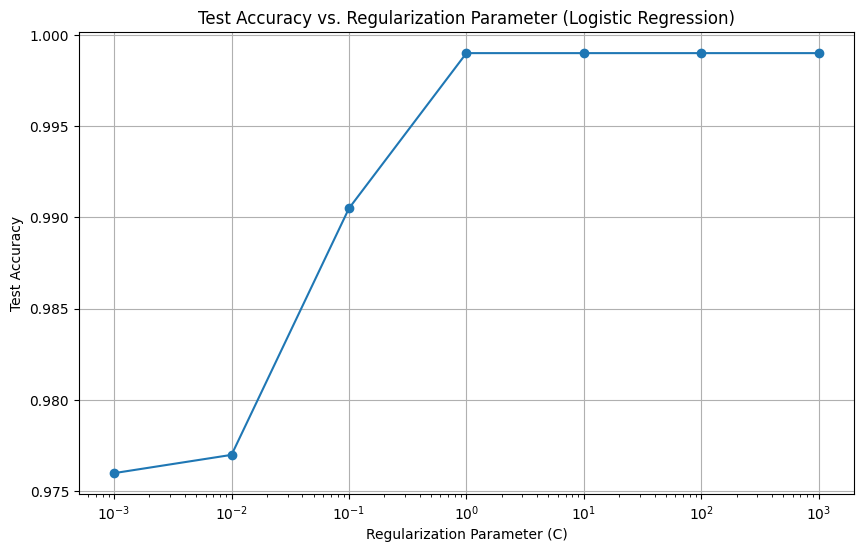

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy values
test_accuracy_values = []
validation_accuracy_values = []

# Define range of regularization parameter (C)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Train logistic regression models with different values of C
for C in C_values:
    logistic_model = LogisticRegression(max_iter=1000, C=C)
    logistic_model.fit(X_train, y_train)

    # Predict machine failure using logistic regression model on test set
    y_pred_test = logistic_model.predict(X_test)

    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_accuracy_values.append(test_accuracy)

# Plot test accuracy vs. regularization parameter (C)
plt.figure(figsize=(10, 6))
plt.plot(C_values, test_accuracy_values, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Regularization Parameter (Logistic Regression)')
plt.grid(True)
plt.show()


Accuracy: 0.999
Confusion Matrix:
[[1939    0]
 [   2   59]]


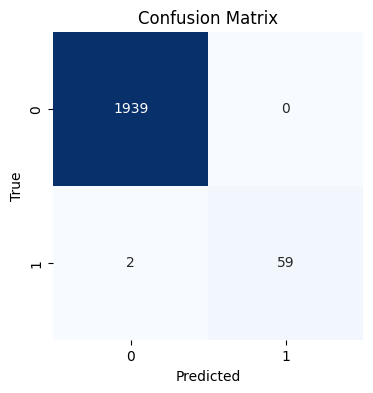

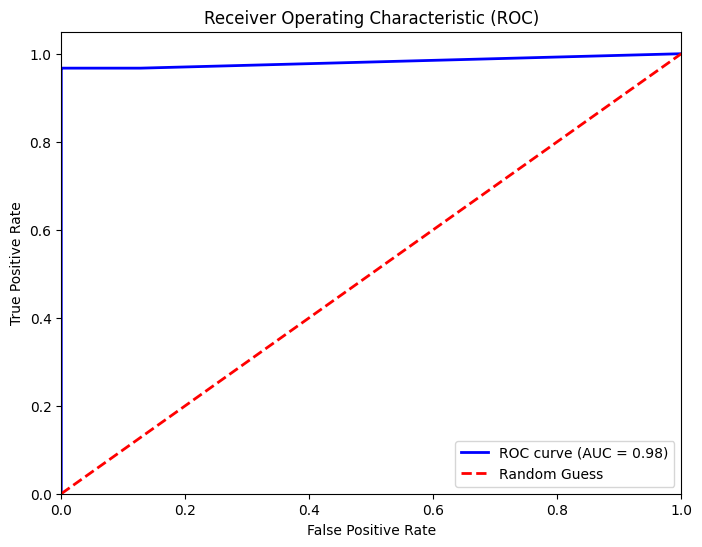

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions

# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict machine failure using the combined features
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate ROC curve and calculate AUC
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Epoch 1/50
250/250 [==============================] - 4s 9ms/step - loss: 3.3868 - accuracy: 0.9370 - val_loss: 0.9029 - val_accuracy: 0.9695
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 2.9788 - accuracy: 0.9364 - val_loss: 0.8984 - val_accuracy: 0.9675
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 1.8632 - accuracy: 0.9395 - val_loss: 0.6044 - val_accuracy: 0.8550
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 1.4570 - accuracy: 0.9416 - val_loss: 1.9986 - val_accuracy: 0.9695
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 2.1710 - accuracy: 0.9391 - val_loss: 0.7768 - val_accuracy: 0.9695
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 1.9655 - accuracy: 0.9377 - val_loss: 1.2570 - val_accuracy: 0.9685
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1.3617 - accuracy: 0.9425 - val_loss: 0.3016 - val_accuracy: 0.9510
Epoch 

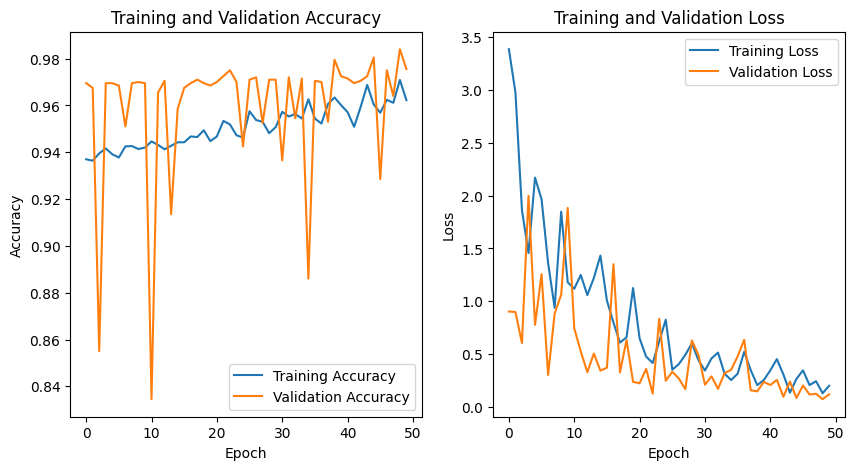

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset = pd.read_csv("ai4i2020.csv")

label_encoder = LabelEncoder()
dataset['Machine failure'] = label_encoder.fit_transform(dataset['Machine failure'])

# Identify non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


# Define fuzzy variables
tool_wear_failure = ctrl.Antecedent(np.arange(0, 241, 1), 'tool_wear_failure')
heat_dissipation_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'heat_dissipation_failure')
power_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'power_failure')
overstrain_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'overstrain_failure')
random_failure = ctrl.Antecedent(np.arange(0, 2, 1), 'random_failure')
machine_failure = ctrl.Consequent(np.arange(0, 2, 1), 'machine_failure')

# Define membership functions
tool_wear_failure['low'] = fuzz.trapmf(tool_wear_failure.universe, [0, 0, 50, 100])
tool_wear_failure['medium'] = fuzz.trapmf(tool_wear_failure.universe, [50, 100, 150, 200])
tool_wear_failure['high'] = fuzz.trapmf(tool_wear_failure.universe, [150, 200, 240, 240])

heat_dissipation_failure['no'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 0, 0])
heat_dissipation_failure['yes'] = fuzz.trimf(heat_dissipation_failure.universe, [0, 1, 1])

power_failure['no'] = fuzz.trimf(power_failure.universe, [0, 0, 0])
power_failure['yes'] = fuzz.trimf(power_failure.universe, [0, 1, 1])

overstrain_failure['no'] = fuzz.trimf(overstrain_failure.universe, [0, 0, 0])
overstrain_failure['yes'] = fuzz.trimf(overstrain_failure.universe, [0, 1, 1])

random_failure['no'] = fuzz.trimf(random_failure.universe, [0, 0, 0])
random_failure['yes'] = fuzz.trimf(random_failure.universe, [0, 1, 1])

machine_failure['no'] = fuzz.trimf(machine_failure.universe, [0, 0, 0])
machine_failure['yes'] = fuzz.trimf(machine_failure.universe, [0, 1, 1])

# Define rules
rule1 = ctrl.Rule(tool_wear_failure['high'], machine_failure['yes'])
rule2 = ctrl.Rule(heat_dissipation_failure['yes'], machine_failure['yes'])
rule3 = ctrl.Rule(power_failure['yes'], machine_failure['yes'])
rule4 = ctrl.Rule(overstrain_failure['yes'], machine_failure['yes'])
rule5 = ctrl.Rule(random_failure['yes'], machine_failure['yes'])
rule6 = ctrl.Rule(tool_wear_failure['low'] & heat_dissipation_failure['no'] & power_failure['no'] & overstrain_failure['no'] & random_failure['no'], machine_failure['no'])

# Create control system
machine_failure_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
machine_failure_simulation = ctrl.ControlSystemSimulation(machine_failure_ctrl)

# Run simulation for all data points
machine_failure_predictions = []

for idx, data_point in dataset.iterrows():
    # Pass input values to the simulation
    machine_failure_simulation.input['tool_wear_failure'] = data_point['Tool wear [min]']
    machine_failure_simulation.input['heat_dissipation_failure'] = 1 if data_point['Air temperature [K]'] - data_point['Process temperature [K]'] < 8.6 and data_point['Rotational speed [rpm]'] < 1380 else 0
    machine_failure_simulation.input['power_failure'] = 1 if data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] < 3500 or data_point['Torque [Nm]'] * data_point['Rotational speed [rpm]'] > 9000 else 0
    machine_failure_simulation.input['overstrain_failure'] = 1 if data_point['Tool wear [min]'] * data_point['Torque [Nm]'] > 11000 else 0
    machine_failure_simulation.input['random_failure'] = 1 if np.random.rand() < 0.001 else 0

    # Compute the output
    machine_failure_simulation.compute()

    # Append the predicted machine failure
    machine_failure_predictions.append(machine_failure_simulation.output['machine_failure'])

# Add the fuzzy system output as a feature to the dataset
dataset['machine_failure_prediction'] = machine_failure_predictions
# Prepare features and target
X = dataset.drop(columns=['Machine failure'])
y = dataset['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
